In [0]:
# Loading data via Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Loading data from url
df=pd.read_csv('bank.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


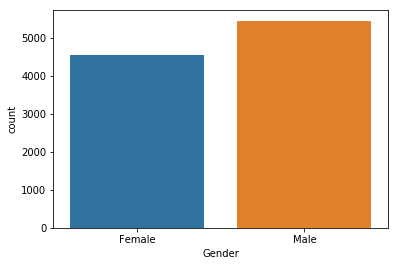

In [3]:
# Countplot by seaborn
sb.countplot(df['Gender'])

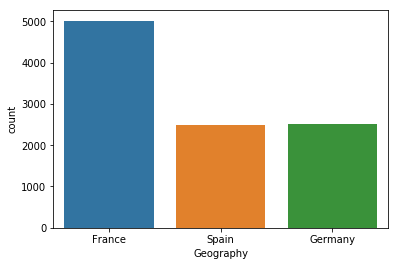

In [4]:
# Comparing countries
sb.countplot(df['Geography'])

In [0]:
df.hist(figsize=(10,15))

In [0]:
# feature and lable of data
features=df.iloc[:,3:13].values
# Label - bank exit status.
label=df.iloc[:,13].values

In [7]:
print(features.shape)
print(label.shape)

(10000, 10)
(10000,)


In [0]:
# To convert string data into numeric we can apply label encoding.
from sklearn.preprocessing import LabelEncoder
countenc = LabelEncoder()  # calling labelencoder

In [9]:
features[0:,1] = countenc.fit_transform(features[0:,1])   # applying on gegraphy column
features.shape

(10000, 10)

In [10]:
# Applying label encoding for Gender
features[0:,2]=countenc.fit_transform(features[0:,2])
features.shape

(10000, 10)

In [0]:
# creating dummy variables using onehot encoder
from sklearn.preprocessing import OneHotEncoder
# calling OneHotEncoding function
counthot = OneHotEncoder(categorical_features = [1])

In [0]:
# Fit and transform
features=counthot.fit_transform(features).toarray()

# Now removing one column from geography, because geography have 3 columns and gender have 2 columns.. so it is recommended to make them equal... so avoid the one column
# Dummy variables number should be equal it is recommended.
features=features[:,1:]
features.shape

In [0]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
train_data,test_data,train_label, test_label  = train_test_split(features,label,test_size=0.2)

In [0]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
# Training data feature scaling
train_data=sc.fit_transform(train_data)

In [16]:
# Testing data feature scaling (transform)
test_data=sc.transform(test_data)
print(test_data.shape)
print(train_data.shape)
# 11 is the number of attributes... we have to keep in mind as we will make 11 neurons in neural network

(2000, 11)
(8000, 11)


# Now we can create   ARITIFICIAL NEURAL NETWORK (ANN)

In [18]:
import keras    #  This is the way of using tensorflow in background

Using TensorFlow backend.


In [0]:
# Keras ANN model library import
from keras.models import Sequential

# This will offer external model of ANN

In [0]:
# Filling data in each layer
from keras.layers import Dense

# This will give the method to decide activation function and number of nodes in each layer.
# including input, hidden and output layer

In [0]:
# Now we can design MODEL
model = Sequential()

In [0]:
# Now we can add INPUT LAYER of NEURAL NETWORK  ( Or First HIDDEN LAYER)
model.add(Dense(6,input_shape=(11,) , activation="relu" ))    # Here we are using "rectifier"  (relu) activation function

#  (units, input layer neurons, activation function)

# 6 - number of units is hidden layer ( 1/2 of neurons/inputs)
# 11 - number of neurons / attributes in input layer..

In [0]:
# Adding one more hidden layer ( We can add any number of hidden layers.)
model.add(Dense(6,activation="relu"))   # Now we don't have to assign number of inputs after first/input layer

In [0]:
# Adding the FINAL LAYER.
model.add(Dense(1, activation='sigmoid'))  # final/output layer would have only 1 neuron

In [0]:
# Compile
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])   # using stochastic gradient descent,  loss function , metrics - will print accuracy after each epoch

# optimizer -- weight adjusting method (gradient_descent - stochastic(adam)) 

In [26]:
# Fitting training data
model.fit(train_data,train_label, batch_size=2000, epochs=100)

# we have 8000 value of data... so we define 4 batch of 2000 

W0709 17:55:53.342767 139636100081536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.8298 - acc: 0.2746
Epoch 2/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.8165 - acc: 0.2849
Epoch 3/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.8033 - acc: 0.3001
Epoch 4/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7904 - acc: 0.3131
Epoch 5/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7781 - acc: 0.3314
Epoch 6/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7663 - acc: 0.3531
Epoch 7/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7553 - acc: 0.3791
Epoch 8/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7449 - acc: 0.4014
Epoch 9/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7350 - acc: 0.4322
Epoch 10/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7256 - acc: 0.4598
Epoch 11/100
8000/

In [27]:
# Now predicting test data
model.predict(test_data)  

array([[0.32660004],
       [0.08849195],
       [0.2599032 ],
       ...,
       [0.30883205],
       [0.3317858 ],
       [0.10658514]], dtype=float32)

In [28]:
# Fitting training data
model.fit(train_data,train_label, batch_size=25, epochs=100)   # reducing batch size will increase accuracy ..  Batch size is the number of times after the weight is adjusted


Epoch 1/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.4423 - acc: 0.8025
Epoch 2/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.4174 - acc: 0.8115
Epoch 3/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.3975 - acc: 0.8186
Epoch 4/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3807 - acc: 0.8320
Epoch 5/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.3684 - acc: 0.8405
Epoch 6/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3619 - acc: 0.8444
Epoch 7/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3576 - acc: 0.8461
Epoch 8/100
8000/8000 [==============================] - 0s 49us/step - loss: 0.3539 - acc: 0.8504
Epoch 9/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3520 - acc: 0.8516
Epoch 10/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3498 - acc: 0.8531
Epoch 11/

In [29]:
# Now predicting test data
model.predict(test_data)  

array([[0.16580135],
       [0.09934437],
       [0.33626676],
       ...,
       [0.04160187],
       [0.94560987],
       [0.09926656]], dtype=float32)